# Lesson 1 Notebook

## Introduction to NetworkX

You can use NetworkX to construct and draw graphs that are undirected or directed, with weighted or unweighted edges. An array of functions to analyze graphs is available. This notebook takes you through a few basic examples and exercises.

## The `import` statement

Recall that `import` statements go at the top of your code, telling Python to load an external module. In this case we want to load NetworkX, but give it a short alias `nx` since we'll have to type it repeatedly, hence the `as` statement.

Lines starting with the `%` character are not Python code, they are "magic" directives for Jupyter notebook. The `%matplotlib inline` magic tells Jupyter Notebook to draw graphics inline i.e. in the notebook. This magic should be used right after the import statement.

In [15]:
import pandas as pd #module to work with dataframes
import networkx as nx #module to work with networks
from Functions import *
%matplotlib inline

## Creating and drawing simple graphs
Let's start by seeing an exaple of how can we generate from scartch an undirected graph using the `Graph` function

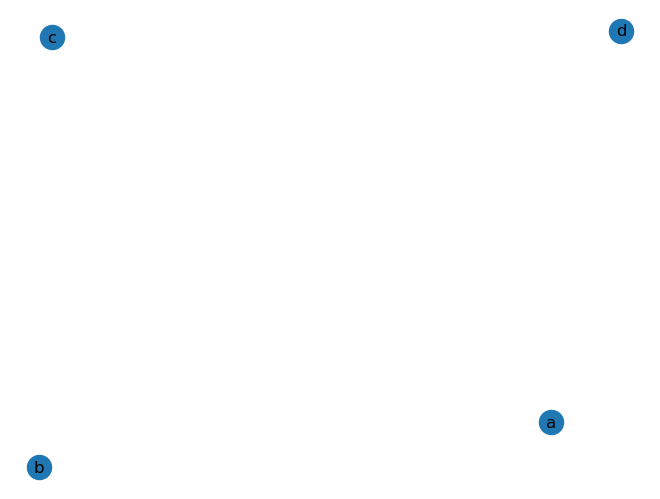

In [7]:
# a "plain" graph is undirected
G = nx.Graph()

# you can add nodes to the graph. Give each node a 'name', which is a letter in this case.
G.add_node('a')

# the add_nodes_from method allows adding nodes from a sequence, in this case a list
nodes_to_add = ['b', 'c', 'd']
G.add_nodes_from(nodes_to_add)

# let's see how it is going: draw the graph
nx.draw(G, with_labels=True)

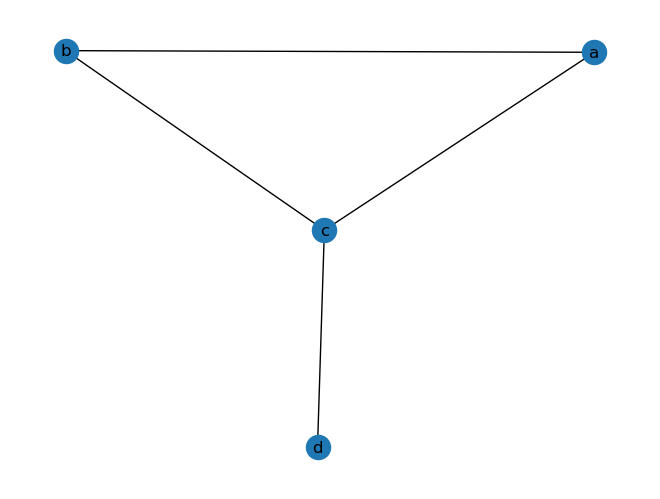

In [8]:
# We need to stablish relationships among these agents. Add and edge from 'a' to 'b'
# since this graph is undirected, the order doesn't matter here
G.add_edge('a', 'b')

# just like add_nodes_from, we can add edges from a sequence
# edges should be specified as 2-tuples
edges_to_add = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)

# draw the graph
nx.draw(G, with_labels=True)

There are many optional arguments to the draw function to customize the appearance.

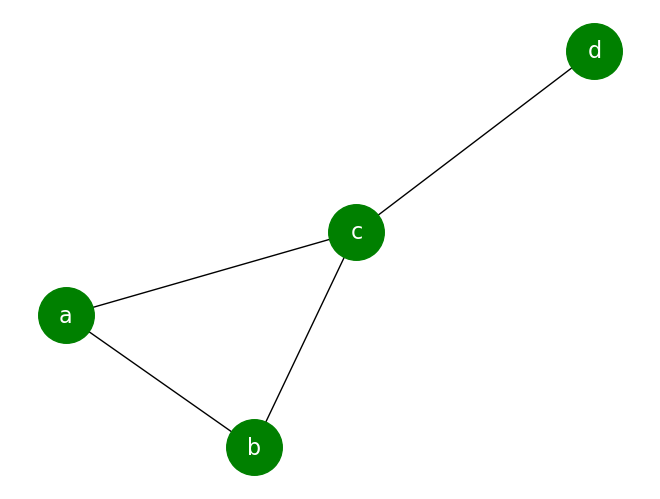

In [9]:
nx.draw(G,
        with_labels=True,
        node_color='green',
        node_size=1600,
        font_color='white',
        font_size=16,
        )

<div class="alert alert-block alert-success"><b>Up to you: </b>
<h3> Exercise 1</h3>
Create the undirected graph corresponding to this simple network

![title](./images/figure1.png)
</div>

In [10]:
# write your code here and run it ################

In [11]:
# Uncomment the following line to see the solution
# %load ./snippets/ex1.py

## Creating non-simple Graphs - Edge properties
As we have seen, we can add different attributes to edges and nodes to enrich the information contained in the network. Usually much information an be incuding regarding the "interaction" between a couple of nodes. The most frequent examples are direction and weigth.

### Directed graphs
Unless otherwise specified, we assume graph edges are undirected -- they are symmetric and go both ways. But some relationships, e.g. predator-prey relationships, are asymmetric and best represented as directed graphs. NetworkX provides the `DiGraph` class for directed graphs. Let's create a **Directed graph** (take notice they are a different class from the undirected basic `Graph` class)

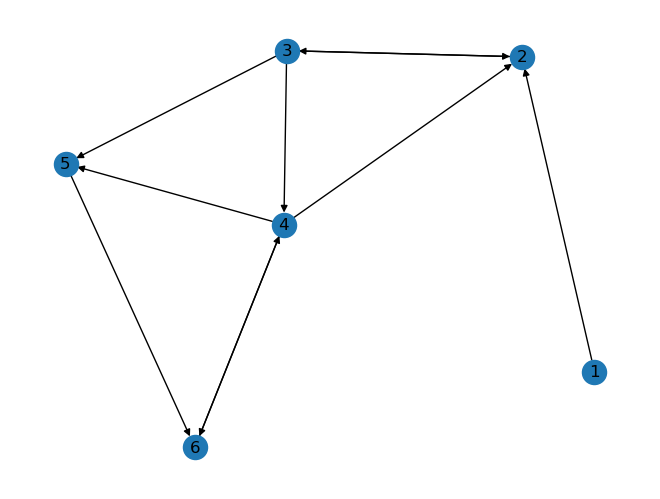

In [12]:
#creating a directed graph
D = nx.DiGraph()

D.add_edges_from([(1,2),(2,3),(3,2),(3,4),(3,5),(4,5),(4,6),(5,6),(6,4),(4,2)])

nx.draw(D, with_labels=True)

Note that in the case of directed graphs the figure automatically displays the arrows indicating the direction of the edge. your turn!

<div class="alert alert-block alert-success"><b>Up to you: </b>
<h3> Exercise 2</h3>
Create the directed graph corresponding to this simple network

![title](./images/figure2.jpg)
</div>

In [13]:
# write your code here and run it 

In [16]:
%%bgc black
# Uncomment the following line to see the solution
# %load ./snippets/ex2.py

In [17]:
#set_background('#CCFFCC')
set_background('black')


### Weighted graphs
We can add further information to the edges between nodes. Including the weigth of the interaction is very frequent. We can create a weighted network by adding the `ẁeigth` attribute to the edges in the network 

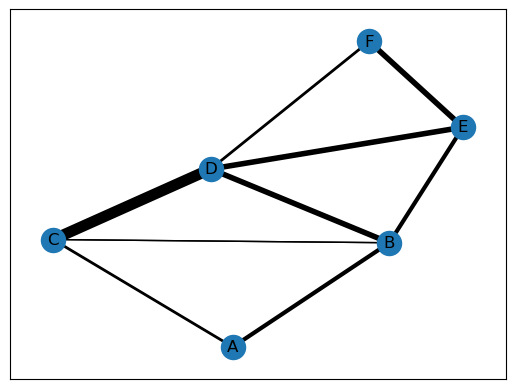

In [45]:
G = nx.Graph()

G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_node('E')
G.add_node('F')

G.add_edge('A', 'B', weight=3)
G.add_edge('A', 'C', weight=2)
G.add_edge('B', 'C', weight=1)
G.add_edge('B', 'E', weight=3)
G.add_edge('C', 'D', weight=8)
G.add_edge('E', 'F', weight=4)
G.add_edge('D', 'F', weight=2)
G.add_edge('B', 'D', weight=4)
G.add_edge('E', 'D', weight=4)

pos=nx.spring_layout(G) # we need to get the position of the nodes to after add the edge labels
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight') #get the edge attribute ẁeigth'
nx.draw_networkx_edges(G = G, pos = pos, edge_color='k', width=list(labels.values())) #representing the weigth tih the thickness of the link
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels) #if you wat to see the weigth

### Custom attributes
In some cases we need to create our own attributes (for example ). It is easy to include this extra information in the networkX format.

<div class="alert alert-block alert-success"><b>Up to you:</b>
<h3> Exercise 3</h3>
Create a Graph containing all these features

FIGURE 3
</div>

## Graphs Methods and NetwokX functions
Once we have information stored in the for of graphs, we want to access that information. There are two different ways to do that: methods included in the Graph, and functions from the NetworkX module that we apply to Graphs.

### Graph Methods
The graph object has some properties and methods giving data about the whole graph. We can access this information using **methods**. 
This data are available via graph *methods*, *i.e.* they are called from the graph object:

    G.<method_name>(<arguments>)

#### Obtaining nodes and edges in the network

In [46]:
# List all of the nodes
G.nodes()

NodeView(('A', 'B', 'C', 'D', 'E', 'F'))

In [47]:
# List all of the edges
G.edges()

EdgeView([('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'E'), ('B', 'D'), ('C', 'D'), ('D', 'F'), ('D', 'E'), ('E', 'F')])

In [48]:
#we can iterate over all the nodes in the network
for node in G.nodes:
    print(node)

A
B
C
D
E
F


In [50]:
#or iterate ver all edges. The edge is represented by a TUPPLE: This type of "container" ->() 
for edge in G.edges:
    print(edge)

('A', 'B')
('A', 'C')
('B', 'C')
('B', 'E')
('B', 'D')
('C', 'D')
('D', 'F')
('D', 'E')
('E', 'F')


Note that the edges are given as 2-tuples, the same way we entered them.

We can get the **number of nodes and edges in a graph** using the `number_of_` methods.

In [51]:
G.number_of_nodes()

6

In [52]:
G.number_of_edges()

9

#### Node and edge existence

To **check if a node is present** in a graph, you can use the `has_node()` method:

In [61]:
G.has_node('a')

False

In [ ]:
G.has_node('A')

Additionally, the loop syntax used above: `for n in G.nodes` suggests another way we can check if a node is in a graph:

In [67]:
'D' in G.nodes

True

Likewise we can **check if two nodes are connected by an edge** using `has_edge`:

In [63]:
G.has_edge('A', 'B')

True

In [65]:
G.has_edge('A', 'E')

In [68]:
('C', 'D') in G.edges

True

#### Node level methods
Some graph methods take an edge or node as argument. These provide the graph properties of the given edge or node. For example, the `.neighbors()` method gives the nodes linked to the given node:

In [54]:
# list of neighbors of node 'b'
G.neighbors('B')

For performance reasons, many graph methods return iterators instead of lists. They are convenient to loop over:

In [56]:
for neighbor in G.neighbors('B'):
    print(neighbor)

A
C
E
D


and you can always use the `list` constructor to make a list from an iterator:

In [69]:
list(G.neighbors('B'))

['A', 'C', 'E', 'D']

##### **Node degree**

One of the most important questions we can ask about a node in a graph is how many other nodes it connects to. Using the `.neighbors()` method from above, we could formulate this question as so:

In [70]:
len(list(G.neighbors('A')))

2

but this is such a common task that NetworkX provides us a graph method to do this in a much clearer way:

In [71]:
G.degree('A')

2

### NetworkX functions
While several of the most-used NetworkX functions are provided as methods, many more of them are module functions and are called like this:

    nx.<function_name>(G, <arguments>)

that is, with the graph provided as the first, and maybe only, argument. Here are a couple of examples of NetworkX module functions that provide information about a graph:

In [59]:
nx.is_connected(G)

True